# MDF Feature engineering

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from prepare_data import PROCESSED_BIG, PROCESSED_SUBSTANCES, TRAIN, TEST, SOURCE

-- get_unique_noconst --
- Number of found duplicated rows :  1389
- Remove constant columns :  (10846, 41) -> (10846, 41)
- Dropped const columns :  


In [4]:
print PROCESSED_BIG.shape, PROCESSED_BIG.columns.values
#PROCESSED_BIG.tail(5)

(10846, 85) [u'agrement col' u'date amm annee' u'date declar annee' u'etat commerc'
 u'forme pharma' u'libelle_ampoule' u'libelle_capsule' u'libelle_comprime'
 u'libelle_film' u'libelle_flacon' u'libelle_gelule' u'libelle_pilulier'
 u'libelle_plaquette' u'libelle_poche' u'libelle_sachet'
 u'libelle_seringue' u'libelle_stylo' u'libelle_tube' u'nb_ampoule'
 u'nb_capsule' u'nb_comprime' u'nb_film' u'nb_flacon' u'nb_gelule' u'nb_ml'
 u'nb_pilulier' u'nb_plaquette' u'nb_poche' u'nb_sachet' u'nb_seringue'
 u'nb_stylo' u'nb_tube' u'prix' 'source' u'statut' u'statut admin'
 u'titulaires' u'tx rembours' u'type proc' 'logprix' u'auriculaire'
 u'buccogingivale' u'cutan\xe9e' u'dentaire' u'endocanalaire'
 u'endosinusale' u'endotrach\xe9obronchique' u'gastrique'
 u'gastro-ent\xe9rale' u'gingivale' u'infiltration' u'inhal\xe9e'
 u'intra cholangio-pancr\xe9atique' u'intra-articulaire'
 u'intra-art\xe9rielle' u'intra-murale' u'intra-ut\xe9rine'
 u'intracaverneuse' u'intradermique' u'intradurale' u'int

In [5]:
print PROCESSED_SUBSTANCES.shape
#PROCESSED_SUBSTANCES.tail(5)

(10846, 1768)


In [6]:
PROCESSED_TRAIN = PROCESSED_BIG[PROCESSED_BIG[SOURCE] == TRAIN].drop(SOURCE, axis=1)
PROCESSED_TRAIN_SUBS = PROCESSED_SUBSTANCES[PROCESSED_SUBSTANCES[SOURCE] == TRAIN].drop(SOURCE, axis=1)

In [ ]:
#PROCESSED_TRAIN_SUBS.tail(5)

### Price histogram

In [7]:
import matplotlib.cm as cmx
import matplotlib.colors as colors

def get_cmap(N):
    '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.'''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

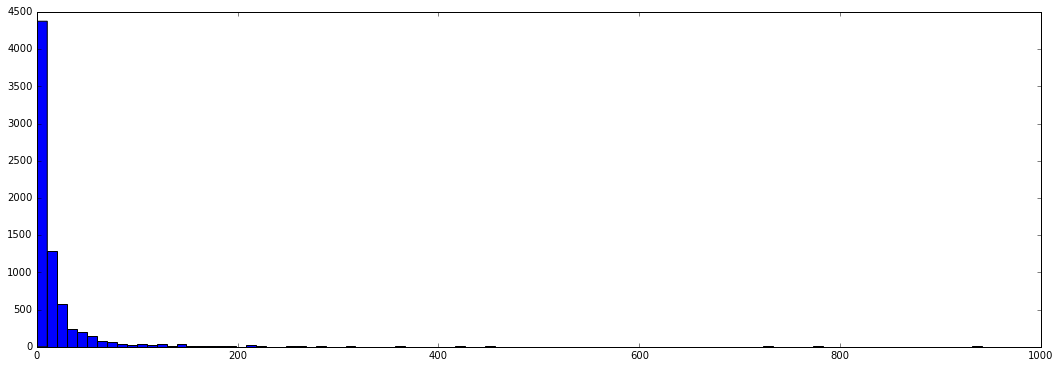

In [11]:
plt.figure(figsize=(18, 6))
out = plt.hist(PROCESSED_TRAIN['prix'], bins=100)
#sns.distplot(PROCESSED_TRAIN['prix'], color='green', kde=False) #kde = kernel denisty

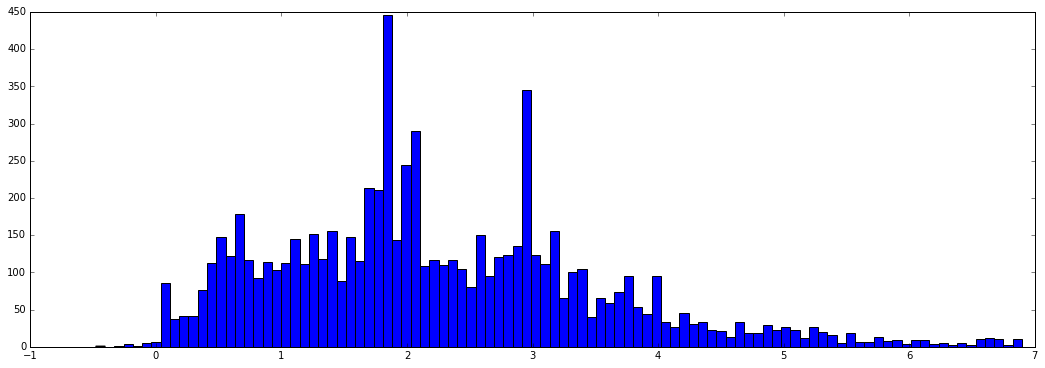

In [12]:
plt.figure(figsize=(18, 6))
PROCESSED_TRAIN['logprix'] = PROCESSED_TRAIN['prix'].apply(np.log)
out = plt.hist(PROCESSED_TRAIN['logprix'], bins=100)
#sns.distplot(PROCESSED_TRAIN['logprix'], color='green', kde=False)

In [13]:
PROCESSED_TRAIN.columns.values

array([u'agrement col', u'date amm annee', u'date declar annee',
       u'etat commerc', u'forme pharma', u'libelle_ampoule',
       u'libelle_capsule', u'libelle_comprime', u'libelle_film',
       u'libelle_flacon', u'libelle_gelule', u'libelle_pilulier',
       u'libelle_plaquette', u'libelle_poche', u'libelle_sachet',
       u'libelle_seringue', u'libelle_stylo', u'libelle_tube',
       u'nb_ampoule', u'nb_capsule', u'nb_comprime', u'nb_film',
       u'nb_flacon', u'nb_gelule', u'nb_ml', u'nb_pilulier',
       u'nb_plaquette', u'nb_poche', u'nb_sachet', u'nb_seringue',
       u'nb_stylo', u'nb_tube', u'prix', u'statut', u'statut admin',
       u'titulaires', u'tx rembours', u'type proc', 'logprix',
       u'auriculaire', u'buccogingivale', u'cutan\xe9e', u'dentaire',
       u'endocanalaire', u'endosinusale', u'endotrach\xe9obronchique',
       u'gastrique', u'gastro-ent\xe9rale', u'gingivale', u'infiltration',
       u'inhal\xe9e', u'intra cholangio-pancr\xe9atique',
       u'intra-

In [ ]:
X = PROCESSED_TRAIN[PROCESSED_TRAIN['nb_comprime'] > 0]['nb_comprime']
y = PROCESSED_TRAIN[PROCESSED_TRAIN['nb_comprime'] > 0]['logprix']
plt.scatter(y, X, color='darkorange')
X = PROCESSED_TRAIN[PROCESSED_TRAIN['nb_capsule'] > 0]['nb_capsule']
y = PROCESSED_TRAIN[PROCESSED_TRAIN['nb_capsule'] > 0]['logprix']
plt.scatter(y, X, color='darkblue')

In [ ]:
X = PROCESSED_TRAIN_SUBS['_ENCODED_']
y = PROCESSED_TRAIN['logprix']
plt.scatter(y, X, color='darkorange')

In [54]:
maxval = np.max(PROCESSED_TRAIN_SUBS['_ENCODED_'])
minval = np.min(PROCESSED_TRAIN_SUBS['_ENCODED_'])
step = 10


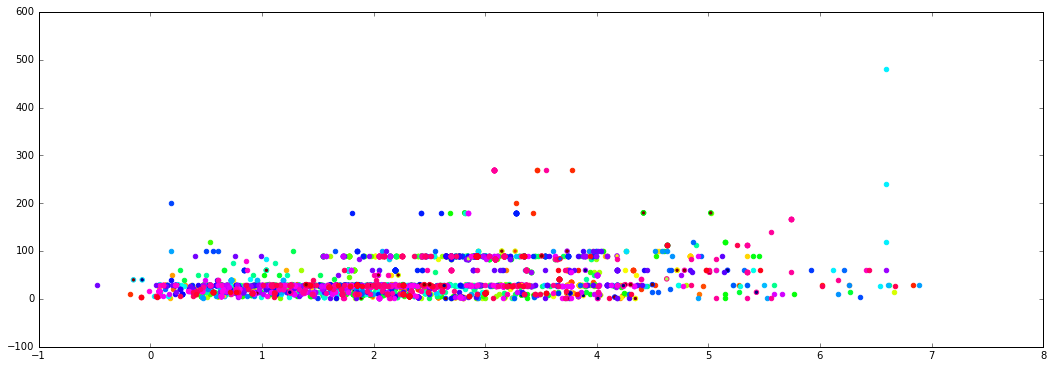

In [60]:
cmap = get_cmap(maxval - minval)    
plt.figure(figsize=(18, 6))
for i in range(minval, maxval):
    df = PROCESSED_TRAIN[((PROCESSED_TRAIN['nb_comprime'] > 0) & (PROCESSED_TRAIN_SUBS['_ENCODED_'] == i))]
    if len(df) > 0:
        XY = df[['nb_comprime', 'logprix']]                                                                                                            
        plt.scatter(XY['logprix'], XY['nb_comprime'], color=cmap(i))

### Feature importance using RandomForestRegressor

In [ ]:
forest = RandomForestRegressor(n_estimators=25, random_state=0)

In [ ]:
#X = PROCESSED_TRAIN.drop(['prix', 'logprix'], axis=1)
X = PROCESSED_TRAIN_SUBS
y = PROCESSED_TRAIN['logprix']

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
# Print the feature ranking
print("Feature ranking:")
features = X.columns.values

for f in range(X.shape[1]):
    print("%d. feature %d '%s' (%f)" % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()